In [7]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
a = "C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\test_images\\com_media_.jpg"
img = cv2.imread(a)
img.shape

(4081, 3265, 3)

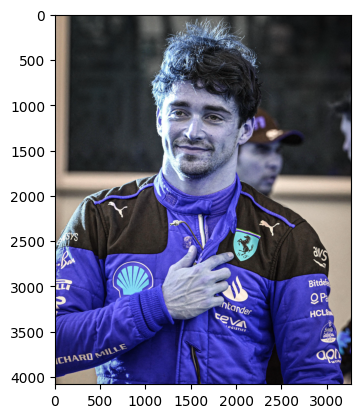

In [9]:
plt.imshow(img)

In [10]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\opencv\\haarcascades\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[1016,  697, 1074, 1074]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(1016, 697, 1074, 1074)

In [12]:
# face_img = cv2.rectangle(img, (x,y),(x+w , y+h) , (255,0,0),10)
# plt.imshow(face_img)

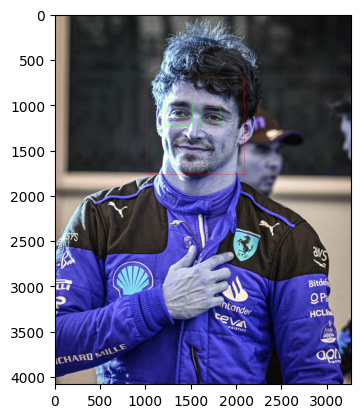

In [13]:


cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()



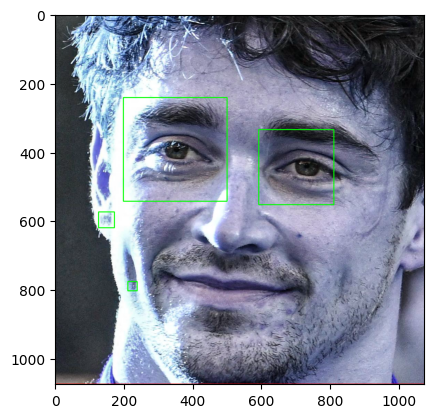

In [14]:


%matplotlib inline
plt.imshow(roi_color, cmap='viridis')




In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at path {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale
    faces = face_cascade.detectMultiScale(gray)  # Detect faces in the grayscale image
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]  # Region of interest in grayscale
        roi_color = img[y:y+h, x:x+w]  # Region of interest in color
        eyes = eye_cascade.detectMultiScale(roi_gray)  # Detect eyes in the grayscale region

        if len(eyes) >= 2:  # Check if at least two eyes are detected
            return roi_color  # Return the color region of interest (face) if two eyes are detected

        
        

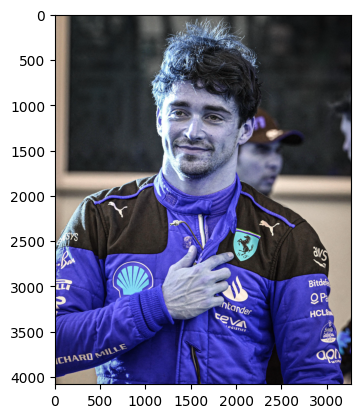

In [16]:
a = "C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\test_images\\com_media_.jpg"
orignal_image = cv2.imread(a)
plt.imshow(orignal_image)

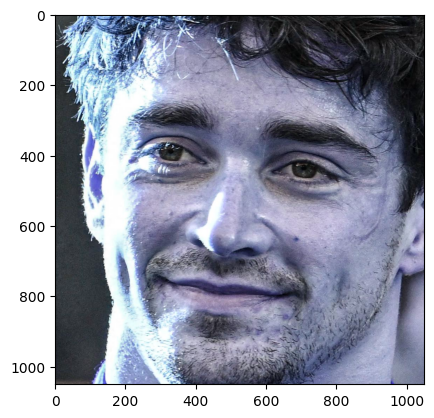

In [17]:
a = "C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\test_images\\com_media_.jpg"
cropped_image = get_cropped_image_if_2_eyes(a)
plt.imshow(cropped_image)

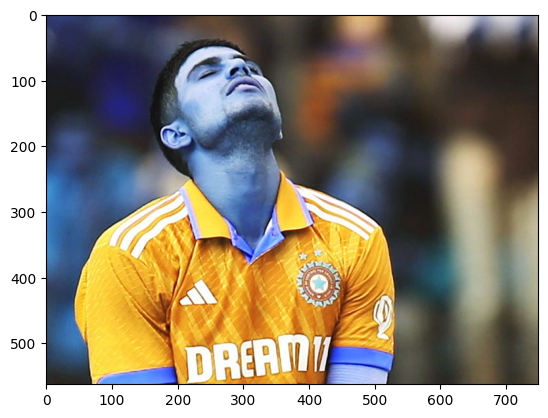

In [18]:
org_img = cv2.imread("C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\test_images\\Shubman-Gill-_18b05f3d965_large.jpg")
plt.imshow(org_img)

In [19]:
cropped_img_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Users\\Dell\\Desktop\\ml\\image classification\\model\\test_images\\Shubman-Gill-_18b05f3d965_large.jpg")
cropped_img_no_2_eyes

In [20]:
path_to_data ="./dataset/"
path_to_cr_data = "./dataset/cropped/"


In [21]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/charles',
 './dataset/cropped',
 './dataset/gill',
 './dataset/hardik',
 './dataset/kohli',
 './dataset/ronaldo']

In [23]:
    import shutil
    if os.path.exists(path_to_cr_data):
        shutil.rmtree(path_to_cr_data)
    os.mkdir(path_to_cr_data)

In [24]:
# Initialize empty lists and dictionaries to store information
cropped_image_dirs = []  # Stores paths of folders where cropped images will be saved
celebrity_file_names_dict = {}  # Stores file names and paths for each celebrity

# Iterate over directories containing images of celebrities
for img_dir in img_dirs:
    count = 1  # Counter for the number of cropped images for each celebrity
    celebrity_name = img_dir.split('/')[-1]  # Extract the celebrity name from the directory path
    print(celebrity_name)  # Print the name of the current celebrity (for debugging or logging)

    # Initialize an empty list in the dictionary to store file names for the current celebrity
    celebrity_file_names_dict[celebrity_name] = []

    # Iterate over entries (files) in the current celebrity's image directory
    for entry in os.scandir(img_dir):
        # Call a function to get a cropped image if at least two eyes are detected
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        # Check if a cropped image is obtained
        if roi_color is not None:
            # Define the folder path for storing cropped images of the current celebrity
            cropped_folder = path_to_cr_data + celebrity_name

            # Create the folder if it doesn't exist
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            # Define the file name for the cropped image
            cropped_file_name = celebrity_name + str(count) + ".png"

            # Define the full file path for the cropped image
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            # Write the cropped image to the specified file path
            cv2.imwrite(cropped_file_path, roi_color)

            # Append the file path to the list in the dictionary for the current celebrity
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

            # Increment the count for the next cropped image
            count += 1

        

charles
Generating cropped images in folder:  ./dataset/cropped/charles
cropped
Error: Unable to load image at path ./dataset/cropped\charles
gill
Generating cropped images in folder:  ./dataset/cropped/gill
hardik
Generating cropped images in folder:  ./dataset/cropped/hardik
kohli
Generating cropped images in folder:  ./dataset/cropped/kohli
Error: Unable to load image at path ./dataset/kohli\1678836965_57c7769197215ff88fbbb4b52c34856d.gif
ronaldo
Generating cropped images in folder:  ./dataset/cropped/ronaldo


In [25]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

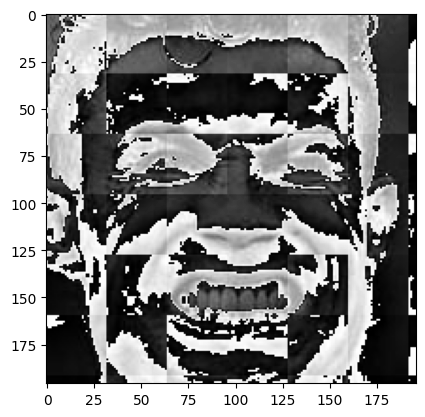

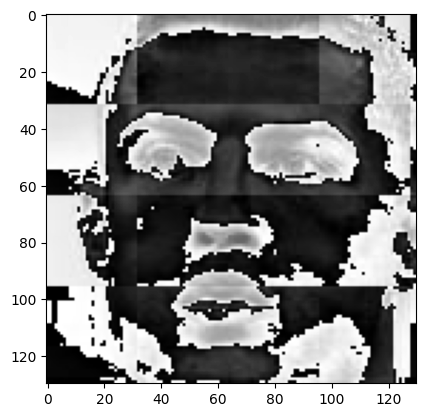

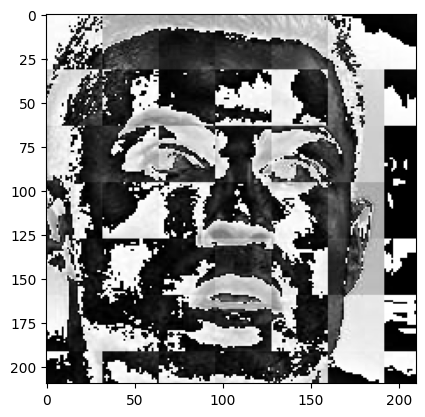

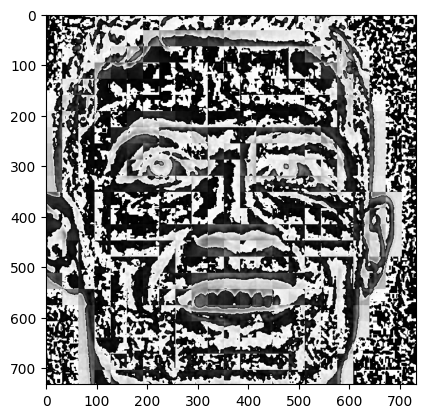

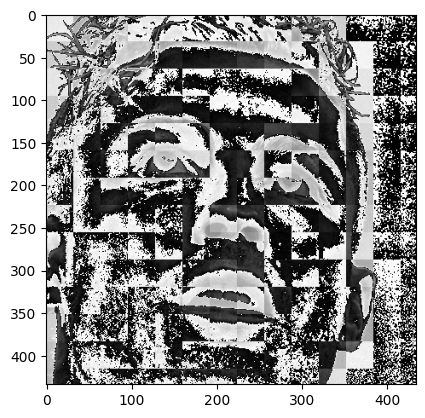

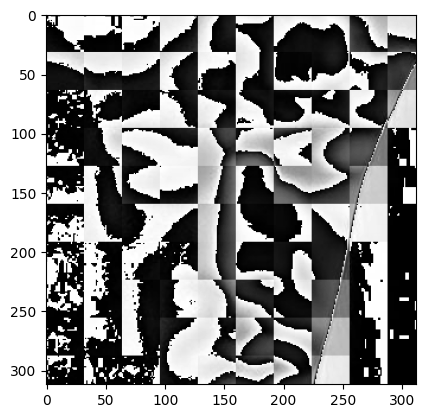

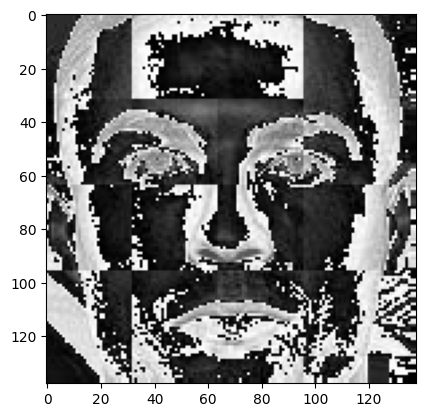

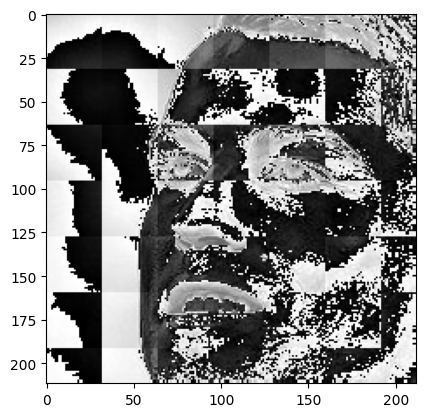

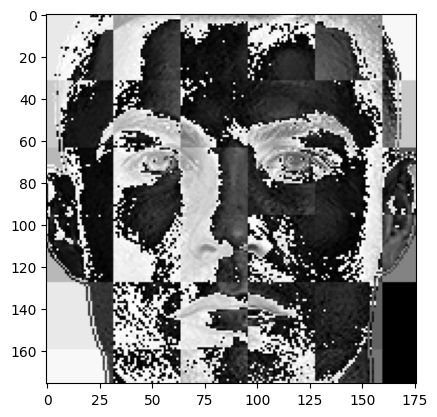

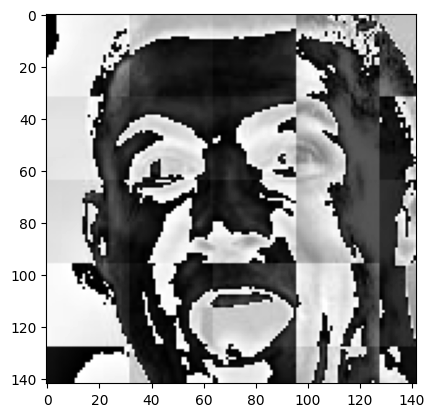

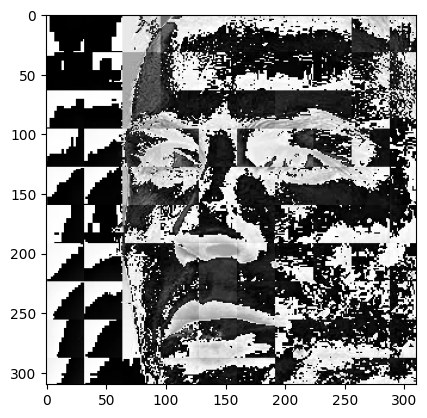

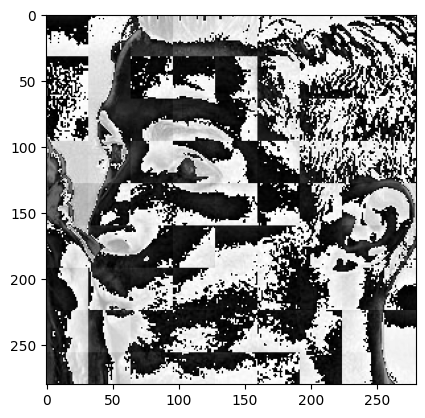

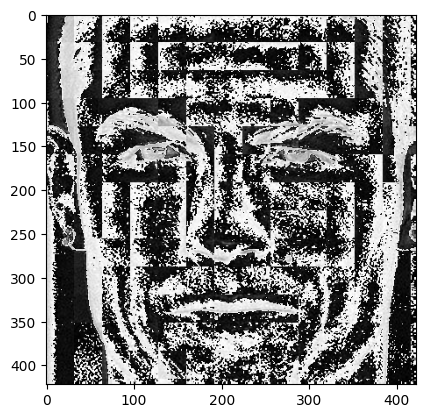

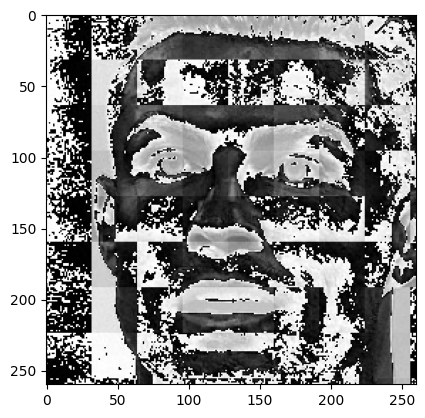

In [26]:


# im_har = w2d(cropped_folder,'db1',5)
# plt.imshow(im_har, cmap='gray')

import os
import matplotlib.pyplot as plt

# Assuming cropped_folder contains the paths to individual image files
for img_path in os.listdir(cropped_folder):
    # Read the image
    img = cv2.imread(os.path.join(cropped_folder, img_path))

    # Apply the w2d function
    im_har = w2d(img, 'db1', 5)

    # Display the result
    plt.imshow(im_har, cmap='gray')
    plt.show()




In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'charles': ['./dataset/cropped/charles\\charles1.png',
  './dataset/cropped/charles\\charles10.png',
  './dataset/cropped/charles\\charles11.png',
  './dataset/cropped/charles\\charles12.png',
  './dataset/cropped/charles\\charles13.png',
  './dataset/cropped/charles\\charles14.png',
  './dataset/cropped/charles\\charles2.png',
  './dataset/cropped/charles\\charles3.png',
  './dataset/cropped/charles\\charles4.png',
  './dataset/cropped/charles\\charles5.png',
  './dataset/cropped/charles\\charles6.png',
  './dataset/cropped/charles\\charles7.png',
  './dataset/cropped/charles\\charles8.png',
  './dataset/cropped/charles\\charles9.png'],
 'gill': ['./dataset/cropped/gill\\gill1.png',
  './dataset/cropped/gill\\gill2.png',
  './dataset/cropped/gill\\gill3.png',
  './dataset/cropped/gill\\gill4.png',
  './dataset/cropped/gill\\gill5.png',
  './dataset/cropped/gill\\gill6.png',
  './dataset/cropped/gill\\gill7.png',
  './dataset/cropped/gill\\gill8.png'],
 'hardik': ['./dataset/cropped/h

In [28]:


class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict



{'charles': 0, 'gill': 1, 'hardik': 2, 'kohli': 3, 'ronaldo': 4}

In [29]:


X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    # celebrety_file_name_dict is key value pair so celebrity_name is key and training_files is value.
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     



In [30]:
len(X)

53

In [31]:


X = np.array(X).reshape(len(X),4096).astype(float)
X.shape



(53, 4096)

In [32]:


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



In [33]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)



0.5

In [34]:


print(classification_report(y_test, pipe.predict(X_test)))



              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         0
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         4
           4       0.38      1.00      0.55         3

    accuracy                           0.50        14
   macro avg       0.41      0.43      0.38        14
weighted avg       0.51      0.50      0.45        14



c:\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Rec

In [35]:


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV



In [36]:


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}



In [37]:


scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



c:\python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


model  best_score  \
0                  svm    0.564286   
1        random_forest    0.439286   
2  logistic_regression    0.667857   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [38]:


best_estimators



{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [39]:


best_estimators['svm'].score(X_test,y_test)



0.5

In [40]:


best_estimators['logistic_regression'].score(X_test,y_test)



0.35714285714285715

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

0.42857142857142855

In [42]:


best_clf = best_estimators['svm']



In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 1, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0],
       [0, 0, 2, 0, 2],
       [0, 0, 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

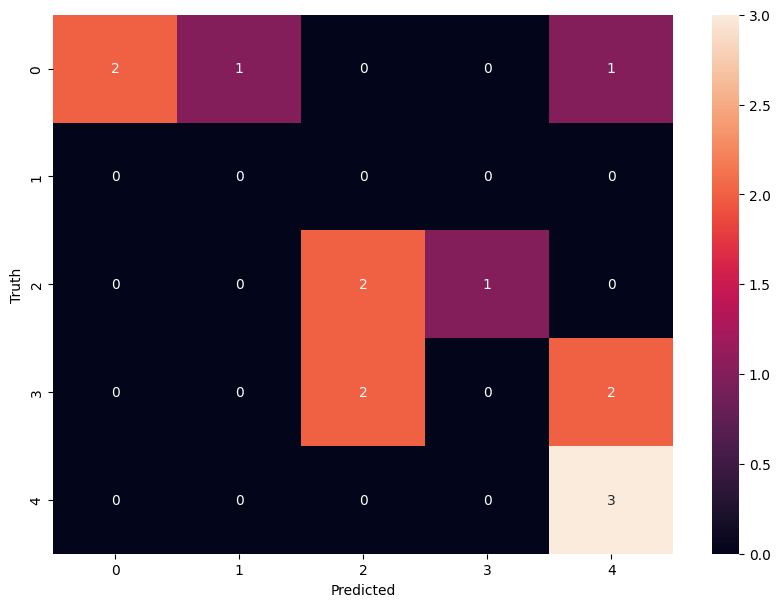

In [44]:


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [45]:


class_dict



{'charles': 0, 'gill': 1, 'hardik': 2, 'kohli': 3, 'ronaldo': 4}

In [46]:



import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 



['saved_model.pkl']

In [47]:


import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

